In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
os.listdir(os.getcwd())

['.ipynb_checkpoints',
 '23.log',
 '23.xls',
 '23_noeeg.log',
 '23_noeeg.xls',
 'behchecks.ipynb']

In [3]:
df = pd.read_excel('23.xls')
df.head(4)

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,78.799403,76,1,2,20,0.061,135,f,0,0.712605
2,80.794798,189,1,2,20,0.757,90,f,1,0.636709
3,83.852374,208,1,2,20,0.511,135,j,1,0.554690
4,87.019134,133,1,2,20,0.220,0,f,1,0.581685


## Selecting relevant data
We need to select correct contrast range and take into account valid RT's.

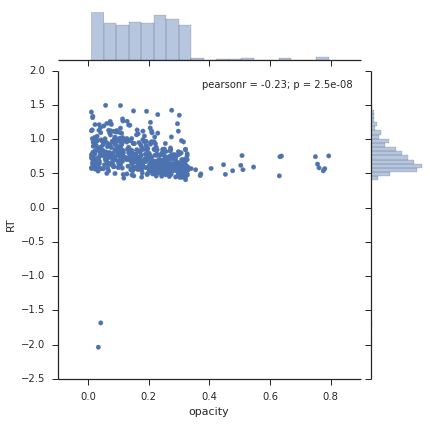

In [4]:
sns.set_style("ticks")
sns.jointplot("opacity", "RT", data=df)

(-0.01, 0.4)

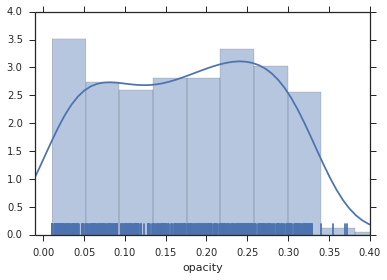

In [5]:
# we will take a subset of trials - by RT and by opacity
sns.distplot(df['opacity'], rug=True)
plt.xlim([-0.01, 0.4])

In [6]:
selection = (df['opacity'] < 0.34) & (df['RT'] > 0)
df_sel = df.loc[selection, :]
df_sel.head()

,time,fixTime,targetTime,SMI,maskTime,opacity,orientation,response,ifcorrect,RT
1,78.799403,76,1,2,20,0.061,135,f,0,0.712605
4,87.019134,133,1,2,20,0.220,0,f,1,0.581685
5,89.468287,77,1,2,20,0.055,90,f,1,0.748268
7,93.321464,124,1,2,20,0.321,135,j,1,0.449966
8,95.536640,248,1,2,20,0.256,45,j,1,0.635857


## contrast --> RT
Reaction times should be faster with increasing contrast. Let's look at that.

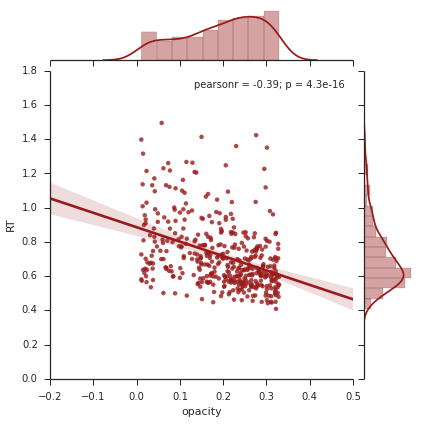

In [33]:
# contrast --> RT (correct trials only)
df_corr = df_sel.loc[df_sel['ifcorrect']==1,:]
sns.jointplot("opacity", "RT", data=df_corr, kind="reg", color=(0.6, 0.1, 0.1))

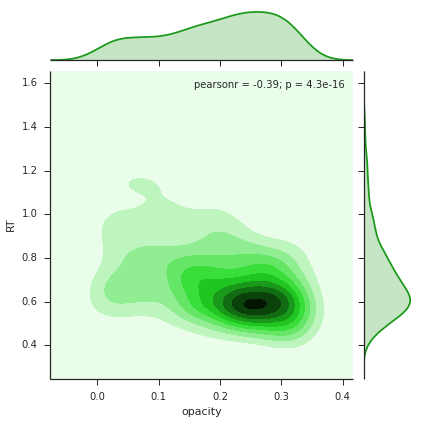

In [42]:
sns.jointplot("opacity", "RT", data=df_corr, kind="kde", color=(0.1, 0.6, 0.1))

## Constrast --> correctness
This will be modelled with weibull, here we use logistic, because it is implemented in seaborn

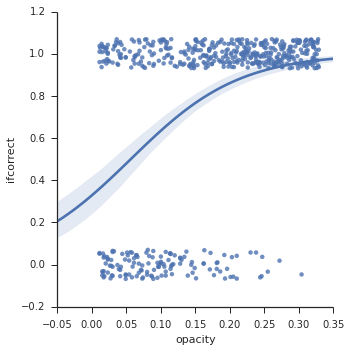

In [34]:
sns.lmplot("opacity", "ifcorrect", data=df_sel, logistic=True, y_jitter=0.07)

In [49]:
print "correctness:    {}".format(df_sel['ifcorrect'].mean())
print "lowest opacity: {}".format(df['opacity'].min())

correctness:    0.755140186916
lowest opacity: 0.011


## Other contrast --> RT checks

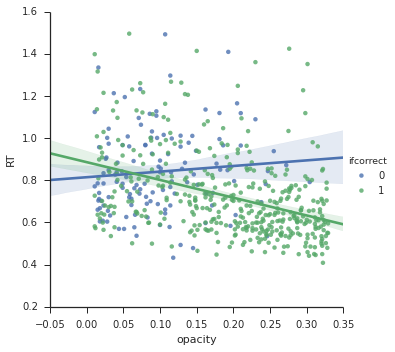

In [28]:
# check orientation:
sns.lmplot("opacity", "RT", data=df_sel, hue="ifcorrect")

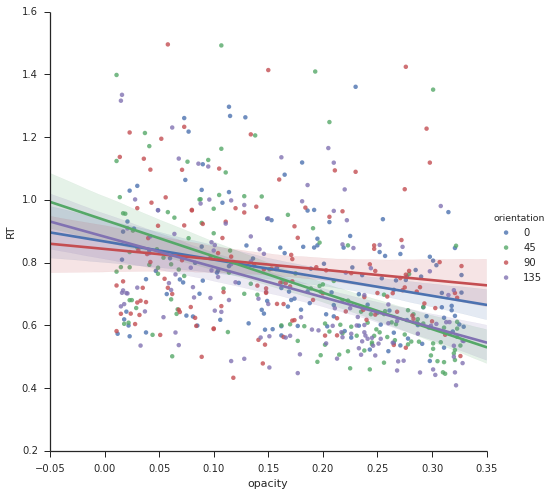

In [32]:
# check orientation:
sns.lmplot("opacity", "RT", data=df_sel, hue="orientation", size=7)

## Response Bias
During the experiment I had the feeling that my responses are biased.  
Unfortunatelly - this seems to be true, especially for the **low contrast** condition...

In [7]:
# check correctnes for different orientations
test_ori = df_sel.groupby('orientation')['ifcorrect'].mean()
test_ori

orientation
0              0.837037
45             0.718519
90             0.804511
135            0.659091
Name: ifcorrect, dtype: float64

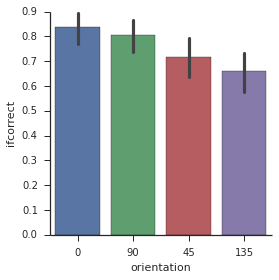

In [15]:
sns.factorplot('orientation', 'ifcorrect', data=df_sel, kind='bar', order=[0,90,45,135])

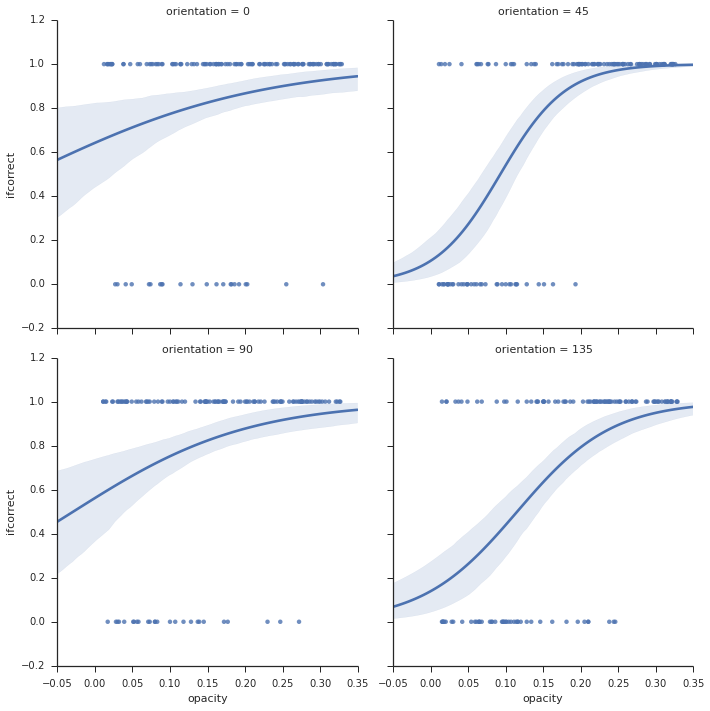

In [14]:
sns.lmplot('opacity', 'ifcorrect', data=df_sel, logistic=True, col='orientation', col_wrap=2)